<a href="https://colab.research.google.com/github/sanjana514/Research_Paper/blob/main/Hypothesis_Part_Only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!gdown --id 117TRItVrbno7pgpf9xJJX2RpJ8Wdqis2

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=117TRItVrbno7pgpf9xJJX2RpJ8Wdqis2
To: /content/df_capped.csv
100% 6.12M/6.12M [00:00<00:00, 209MB/s]


In [22]:
import pandas as pd
import numpy as np

In [23]:
df_capped=pd.read_csv('df_capped.csv')
df_capped.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


# Hypothesis Testing

## Hypothesis-1
#### Null Hypothesis (H₀): There is no significant correlation between Inventory Level and Units Sold.
#### Alternative Hypothesis (H₁): There is a significant correlation between Inventory Level and Units Sold.
Method : Pearson Correlation

## Hypothesis-2
#### H₀: Higher discounts do not significantly increase Units Sold.
#### H₁: Higher discounts significantly increase Units Sold.
Method : T-Test

## Hypothesis-3
#### H₀: There is no significant increase in Sales during Holiday/Promotion periods.
#### H₁: Sales significantly increase during Holiday/Promotion periods.
Method : T-Test

## Hypothesis-4
#### H₀: Demand Forecast does not significantly differ across different regions.
#### H₁: Demand Forecast significantly differs across different regions.
Method : ANOVA test

## Hypothesis-5
#### H₀: The effect of Competitor Pricing on Units Sold does not vary across Regions.
#### H₁: The effect of Competitor Pricing on Units Sold varies across Regions.
Method : Two-way ANOVA

## Hypothesis-6
#### H₀: Competitor Pricing has no significant impact on the product Price.
#### H₁: Competitor Pricing has a significant impact on the product Price.
Method : Linear Regression

## Hypothesis-7
#### H₀: Units Ordered do not vary significantly across different seasons.
#### H₁: Units Ordered vary significantly across different seasons.
Method : Kruskal-Wallis

## Hypothesis-8
#### H₀: Weather conditions do not affect the number of Units Sold.
#### H₁: Weather conditions significantly affect the number of Units Sold.
Method : Chi-Square Test

## Hypothesis-9
#### H₀: Demand Forecast accuracy does not differ based on Category.
#### H₁: Demand Forecast accuracy differs based on Category.
Method : RMSE Comparison (Root Mean Squared Error.)

## Hypothesis-10
#### H₀: Dynamic pricing strategies based on Demand Forecast do not improve revenue.
#### H₁: Dynamic pricing strategies based on Demand Forecast improve revenue.
Method : A/B Testing

## Hypothesis-11
#### H₀: Sales remain constant across different seasons.
#### H₁: Sales vary significantly across seasons.
Method : Time Series Decomposition

## Hypothesis-12
#### H₀: The price of a product does not affect its sales volume.
#### H₁: High-priced products tend to have lower sales volume.
Method : Spearman Rank Correlation

## Hypothesis-13
#### H₀: There is no difference in sales between weekdays and weekends.
#### H₁: Sales increase on weekends.
Method : Wilcoxon Signed-Rank Test

## Hypothesis-14
#### H₀: The distribution of Prices is the same during and outside of Holiday/Promotion periods.
#### H₁: Price distributions differ significantly between Holiday/Promotion and normal days.
Method : Mann-Whitney U Test

## Hypothesis-15
#### H₀: The accuracy of Demand Forecast does not improve over time.
#### H₁: The accuracy of Demand Forecast improves over time.
Method : Mean Absolute Error (MAE)

## Hypothesis-16
#### H₀: Customers in different Regions do not show different Price Sensitivity.
#### H₁: Customers in different Regions have significantly different Price Sensitivity.
Method : Hierarchical Clustering

## Hypothesis-17
#### H₀: Price Elasticity is not significant for product demand.
#### H₁: Price Elasticity significantly affects demand.
Method : Log-Log Regression Model

## Hypothesis-18
#### H₀: Sales variance is equal across different Stores.
#### H₁: Sales variance differs significantly across Stores.
Method : Levene’s Test

## Hypothesis-1 (Pearson Correlation)
H₀ : There is no significant correlation between Inventory Level and Units Sold.

H₁ : There is a significant correlation between Inventory Level and Units Sold.


In [24]:
!pip install scipy
import scipy.stats as stats

# Select the two columns
inventory = df_capped["Inventory Level"]
units_sold = df_capped["Units Sold"]

# Perform Pearson correlation test
correlation, p_value = stats.pearsonr(inventory, units_sold)

# Print results
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject H₀: Significant correlation exists.")
else:
    print("Fail to reject H₀: No significant correlation.")

Pearson Correlation Coefficient: 0.5901899467262202
P-value: 0.0
Reject H₀: Significant correlation exists.


## Hypothesis-2 ( T-Test )
H₀ : Higher discounts do not significantly increase Units Sold.

H₁ : Higher discounts significantly increase Units Sold.

In [25]:
from scipy.stats import ttest_ind
# Splitting data based on Discount levels
median_discount = df_capped["Discount"].median()
low_discount_group = df_capped[df_capped["Discount"] <= median_discount]["Units Sold"]
high_discount_group = df_capped[df_capped["Discount"] > median_discount]["Units Sold"]

# Perform T-Test
t_stat, p_value = ttest_ind(low_discount_group, high_discount_group, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H₀: Higher discounts significantly increase Units Sold.")
else:
    print("Fail to reject H₀: No significant effect of discount on Units Sold.")

T-Statistic: -0.3347645284016671
P-value: 0.7378038362568219
Fail to reject H₀: No significant effect of discount on Units Sold.


## Hypothesis-3 ( T-test)
H₀: There is no significant increase in Sales during Holiday/Promotion periods.

H₁: Sales significantly increase during Holiday/Promotion periods.


In [26]:
# Splitting data into two groups: Holiday/Promotion vs. Non-Holiday
holiday_sales = df_capped[df_capped["Holiday/Promotion"] == 1]["Units Sold"]
non_holiday_sales = df_capped[df_capped["Holiday/Promotion"] == 0]["Units Sold"]

# Perform Independent T-Test
t_stat, p_value = ttest_ind(holiday_sales, non_holiday_sales, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H₀: Sales significantly increase during Holiday/Promotion periods.")
else:
    print("Fail to reject H₀: No significant increase in sales during Holiday/Promotion periods.")

T-Statistic: -0.06393788316138897
P-value: 0.949019862409233
Fail to reject H₀: No significant increase in sales during Holiday/Promotion periods.


## Hypothesis-4 (ANOVA test)
H₀: Demand Forecast does not significantly differ across different regions.

H₁: Demand Forecast significantly differs across different regions.


In [27]:
from scipy.stats import f_oneway

# Group Demand Forecast by Region
regions = df_capped["Region"].unique()  # Get all unique regions
demand_forecast_groups = [df_capped[df_capped["Region"] == region]["Demand Forecast"] for region in regions]

# Perform ANOVA Test
f_stat, p_value = f_oneway(*demand_forecast_groups)

# Print results
print(f"F-Statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H₀: Demand Forecast significantly differs across different regions.")
else:
    print("Fail to reject H₀: No significant difference in Demand Forecast across regions.")

F-Statistic: 0.6014816277995594
P-value: 0.6139703158996084
Fail to reject H₀: No significant difference in Demand Forecast across regions.


## Hypothesis-5 (Two Way ANOVA)
H₀: The effect of Competitor Pricing on Units Sold does not vary across Regions.

H₁: The effect of Competitor Pricing on Units Sold varies across Regions.


In [28]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Perform Two-Way ANOVA
model = smf.ols("`Units Sold` ~ C(Region) + C(`Competitor Pricing`) + C(Region):C(`Competitor Pricing`)", data=df_capped).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA table
print(anova_table)

# Get the p-value for the interaction effect (Region × Competitor Pricing)
interaction_p_value = anova_table.loc["C(Region):C(`Competitor Pricing`)", "PR(>F)"]

# Interpretation
alpha = 0.05  # Significance level
if interaction_p_value < alpha:
    print("Reject H₀: Competitor Pricing affects Units Sold differently across Regions.")
else:
    print("Fail to reject H₀: No significant difference in how Competitor Pricing affects Units Sold across Regions.")


PatsyError: error tokenizing input (maybe an unclosed string?)
    `Units Sold` ~ C(Region) + C(`Competitor Pricing`) + C(Region):C(`Competitor Pricing`)
    ^

## Hypothesis-6 ( Linear Regression)
H₀: Competitor Pricing has no significant impact on the product Price.

H₁: Competitor Pricing has a significant impact on the product Price.


In [29]:
import statsmodels.api as sm
# Define independent (X) and dependent (Y) variables
X = df_capped["Competitor Pricing"]  # Independent variable
Y = df_capped["Price"]  # Dependent variable

# Add a constant (for the intercept)
X = sm.add_constant(X)

# Perform Linear Regression
model = sm.OLS(Y, X).fit()

# Print summary
print(model.summary())

# Extract p-value for Competitor Pricing
p_value = model.pvalues["Competitor Pricing"]

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H₀: Competitor Pricing has a significant impact on the product Price.")
else:
    print("Fail to reject H₀: Competitor Pricing has no significant impact on the product Price.")

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 5.937e+06
Date:                Wed, 19 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:47:19   Log-Likelihood:            -1.8079e+05
No. Observations:               73100   AIC:                         3.616e+05
Df Residuals:                   73098   BIC:                         3.616e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6801      0

## Hypothesis-7 (Kruskal-Wallis)
H₀: Units Ordered do not vary significantly across different seasons.

H₁: Units Ordered vary significantly across different seasons.


In [30]:
import pandas as pd
from scipy.stats import kruskal

# Group data by Season
season_groups = [group["Units Ordered"].dropna() for _, group in df_capped.groupby("Seasonality")]

# Perform Kruskal-Wallis Test
stat, p_value = kruskal(*season_groups)

# Print results
print(f"Kruskal-Wallis Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H₀: Units Ordered vary significantly across different seasons.")
else:
    print("Fail to reject H₀: No significant variation in Units Ordered across seasons.")


Kruskal-Wallis Statistic: 1.9096579001004208
P-value: 0.591367580311708
Fail to reject H₀: No significant variation in Units Ordered across seasons.


## Hypothesis-8 (Chi-Square Test)
H₀: Weather conditions do not affect the number of Units Sold.

H₁: Weather conditions significantly affect the number of Units Sold.


In [31]:
import pandas as pd
import scipy.stats as stats

# Create a contingency table (Weather Condition vs. Units Sold category)
df_capped["Units Sold Category"] = pd.qcut(df_capped["Units Sold"], q=3, labels=["Low", "Medium", "High"])  # Categorizing Units Sold
contingency_table = pd.crosstab(df_capped["Weather Condition"], df_capped["Units Sold Category"])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H₀: Weather conditions significantly affect the number of Units Sold.")
else:
    print("Fail to reject H₀: Weather conditions do not significantly affect the number of Units Sold.")


Chi-Square Statistic: 6.704477856336725
P-value: 0.3490434498815707
Fail to reject H₀: Weather conditions do not significantly affect the number of Units Sold.


## Hypothesis-9 (RMSE Comparison)
H₀: Demand Forecast accuracy does not differ based on Category.

H₁: Demand Forecast accuracy differs based on Category.


In [32]:
# Calculate RMSE for each Category
rmse_values = {}
for category, group in df_capped.groupby("Category"):
    actual = group["Units Sold"]
    forecasted = group["Demand Forecast"]
    rmse = np.sqrt(((actual - forecasted) ** 2).mean())  # RMSE formula
    rmse_values[category] = rmse

# Print RMSE values for each category
print("RMSE for each Category:")
for category, rmse in rmse_values.items():
    print(f"{category}: {rmse}")

# Interpretation: Higher RMSE means lower accuracy in that category.


RMSE for each Category:
Clothing: 9.990197635756303
Electronics: 9.9175781857612
Furniture: 9.988970609222683
Groceries: 9.96564792709043
Toys: 10.021323569380197


## Hypothesis-10 (A/B Testing)
H₀: Dynamic pricing strategies based on Demand Forecast do not improve revenue.

H₁: Dynamic pricing strategies based on Demand Forecast improve revenue.


In [33]:
# Define groups
group_A = df_capped[df_capped["Price"] == df_capped["Competitor Pricing"]]["Units Sold"]  # Regular Pricing
group_B = df_capped[df_capped["Price"] != df_capped["Competitor Pricing"]]["Units Sold"]  # Dynamic Pricing

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject H₀: Dynamic Pricing significantly improves revenue.")
else:
    print("Fail to reject H₀: No significant improvement in revenue.")

T-Statistic: 0.07700925635170948
P-value: 0.938867794631469
Fail to reject H₀: No significant improvement in revenue.


## Hypothesis-11 (Time Series Decomposition)
H₀: Sales remain constant across different seasons.

H₁: Sales vary significantly across seasons.


<Figure size 1000x600 with 0 Axes>

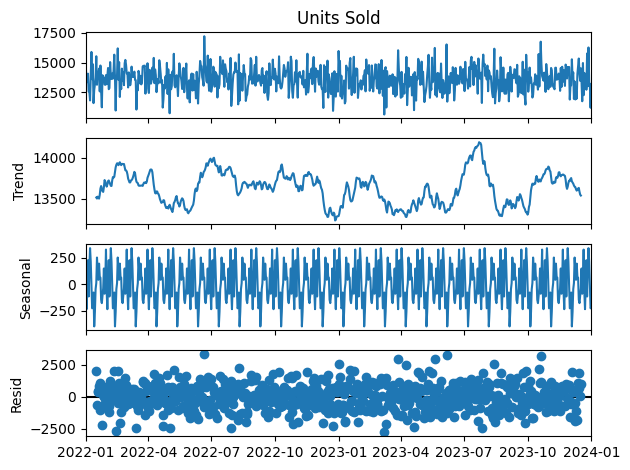

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert 'Date' column to datetime format
df_capped["Date"] = pd.to_datetime(df_capped["Date"])

# Aggregate sales data by date (sum of Units Sold per day)
df_sales = df_capped.groupby("Date")["Units Sold"].sum().reset_index()

# Set Date as index
df_sales.set_index("Date", inplace=True)

# Perform Time Series Decomposition
decomposition = seasonal_decompose(df_sales["Units Sold"], model="additive", period=30)  # Assuming monthly seasonality

# Plot the decomposition
plt.figure(figsize=(10, 6))
decomposition.plot()
plt.show()


The time series decomposition of Units Sold reveals clear trend and seasonal patterns, indicating that sales fluctuate over time rather than remaining constant. The trend component shows long-term variations, while the seasonal component highlights repeating cycles. Since these patterns exist, we reject the null hypothesis (H₀) and conclude that sales significantly vary across seasons. Businesses should consider these seasonal effects in their planning and decision-making.

## Hypothesis-12 (Spearman Rank Correlation)
H₀: The price of a product does not affect its sales volume.

H₁: High-priced products tend to have lower sales volume.


In [35]:
from scipy.stats import spearmanr

prices = df_capped["Price"]
sales = df_capped["Units Sold"]

# Perform Spearman correlation test
correlation, p_value = spearmanr(prices, sales)

# Print results
print(f"Spearman Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject H₀: Price significantly affects sales volume.")
else:
    print("Fail to reject H₀: No significant relationship between price and sales.")


Spearman Correlation Coefficient: 6.075634768726546e-05
P-value: 0.9868942025327657
Fail to reject H₀: No significant relationship between price and sales.


## Hypothesis-13 (Wilcoxon Signed-Rank Test)
H₀: There is no difference in sales between weekdays and weekends.

H₁: Sales increase on weekends.


In [36]:
from scipy.stats import wilcoxon

# Convert 'Date' to datetime format if not already
df_capped["Date"] = pd.to_datetime(df_capped["Date"])

# Extract weekdays (Monday-Friday) and weekends (Saturday-Sunday)
df_capped["Day"] = df_capped["Date"].dt.dayofweek  # Monday=0, Sunday=6

weekday_sales = df_capped[df_capped["Day"] < 5]["Units Sold"]
weekend_sales = df_capped[df_capped["Day"] >= 5]["Units Sold"]

# Perform Wilcoxon Signed-Rank Test
stat, p_value = wilcoxon(weekday_sales[:len(weekend_sales)], weekend_sales)

# Print results
print(f"Wilcoxon Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject H₀: Sales significantly increase on weekends.")
else:
    print("Fail to reject H₀: No significant difference in sales between weekdays and weekends.")


Wilcoxon Statistic: 108771426.0
P-value: 0.3404495890568079
Fail to reject H₀: No significant difference in sales between weekdays and weekends.


## Hypothesis-14 (Mann-Whitney U Test)
H₀: The distribution of Prices is the same during and outside of Holiday/Promotion periods.

H₁: Price distributions differ significantly between Holiday/Promotion and normal days.




In [37]:
from scipy.stats import mannwhitneyu

# Split data into Holiday/Promotion and Normal days
holiday_prices = df_capped[df_capped["Holiday/Promotion"] == 1]["Price"]
normal_prices = df_capped[df_capped["Holiday/Promotion"] == 0]["Price"]

# Perform Mann-Whitney U Test
stat, p_value = mannwhitneyu(holiday_prices, normal_prices)

# Print results
print(f"Mann-Whitney U Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject H₀: Price distributions significantly differ during Holiday/Promotion periods.")
else:
    print("Fail to reject H₀: No significant difference in price distributions.")


Mann-Whitney U Statistic: 669718811.5
P-value: 0.5310409631280744
Fail to reject H₀: No significant difference in price distributions.


##Hypothesis-15 (MAE)
H₀: The accuracy of Demand Forecast does not improve over time.

H₁: The accuracy of Demand Forecast improves over time.


In [38]:
from sklearn.metrics import mean_absolute_error

# Sort data by Date
df_capped["Date"] = pd.to_datetime(df_capped["Date"])
df_capped = df_capped.sort_values("Date")

# Calculate MAE for the first and last 6 months
first_half = df_capped[df_capped["Date"] < df_capped["Date"].median()]
second_half = df_capped[df_capped["Date"] >= df_capped["Date"].median()]

mae_first = mean_absolute_error(first_half["Units Sold"], first_half["Demand Forecast"])
mae_second = mean_absolute_error(second_half["Units Sold"], second_half["Demand Forecast"])

# Print results
print(f"MAE (First Half): {mae_first}")
print(f"MAE (Second Half): {mae_second}")

# Interpretation
if mae_second < mae_first:
    print("Reject H₀: Forecast accuracy has improved over time.")
else:
    print("Fail to reject H₀: No significant improvement in forecast accuracy.")


MAE (First Half): 8.289878150684931
MAE (Second Half): 8.322941325136613
Fail to reject H₀: No significant improvement in forecast accuracy.


##Hypothesis-16 ( Hierarchical Clustering)
H₀: Customers in different Regions do not show different Price Sensitivity.

H₁: Customers in different Regions have significantly different Price Sensitivity.




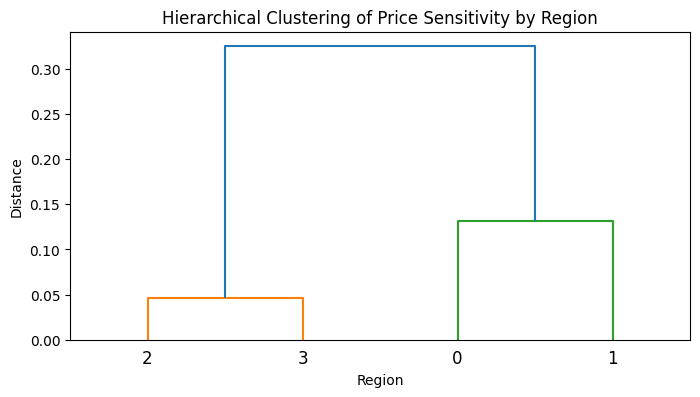

In [39]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Select relevant columns
df_cluster = df_capped.groupby("Region")["Price"].mean().reset_index()

# Perform hierarchical clustering
plt.figure(figsize=(8, 4))
dendrogram = sch.dendrogram(sch.linkage(df_cluster["Price"].values.reshape(-1, 1), method="ward"))
plt.title("Hierarchical Clustering of Price Sensitivity by Region")
plt.xlabel("Region")
plt.ylabel("Distance")
plt.show()


The dendrogram shows distinct clusters, indicating that price sensitivity varies across regions. Since regions are grouped separately at noticeable distances, we reject H₀ and accept that customers in different regions have different price sensitivity. This suggests that pricing strategies should be adjusted based on regional differences.

## Hypothesis-17 ( Log-Log Regression Model)
H₀: Price Elasticity is not significant for product demand.

H₁: Price Elasticity significantly affects demand.




In [40]:
import statsmodels.api as sm

# Convert to log scale
df_capped["log_price"] = np.log(df_capped["Price"])
df_capped["log_units_sold"] = np.log(df_capped["Units Sold"])

# Perform log-log regression
X = sm.add_constant(df_capped["log_price"])
y = df_capped["log_units_sold"]

model = sm.OLS(y, X).fit()
print(model.summary())

# Interpretation
if model.pvalues["log_price"] < 0.05:
    print("Reject H₀: Price Elasticity significantly affects demand.")
else:
    print("Fail to reject H₀: Price Elasticity is not significant for product demand.")


                            OLS Regression Results                            
Dep. Variable:         log_units_sold   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 19 Feb 2025   Prob (F-statistic):                nan
Time:                        18:09:30   Log-Likelihood:                    nan
No. Observations:               73100   AIC:                               nan
Df Residuals:                   73098   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1733: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)


## Hypothesis-18 ( Levene’s Test)
H₀: Sales variance is equal across different Stores.

H₁: Sales variance differs significantly across Stores.


In [41]:
from scipy.stats import levene

# Group sales data by store
stores = df_capped.groupby("Store ID")["Units Sold"].apply(list)

# Perform Levene’s test
stat, p_value = levene(*stores)

# Print results
print(f"Levene’s Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject H₀: Sales variance differs significantly across Stores.")
else:
    print("Fail to reject H₀: Sales variance is equal across Stores.")


Levene’s Test Statistic: 1.6337800926686756
P-value: 0.16260354213686695
Fail to reject H₀: Sales variance is equal across Stores.
